In [2]:
pip install tensorflow


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.4 which is incompatible.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


In [3]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

import os
import numpy as np
import matplotlib.pyplot as plt

D:\ana\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
# Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

#!unzip cats_and_dogs.zip

PATH = "C:\\Users\\Yash\\Downloads\\cats_and_dogs\\cats_and_dogs"

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [32]:
# 3
train_image_generator = ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)
# batch_size = 128
# epochs = 15
# IMG_HEIGHT = 150
# IMG_WIDTH = 150
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=PATH, classes=['test'],
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="input", shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


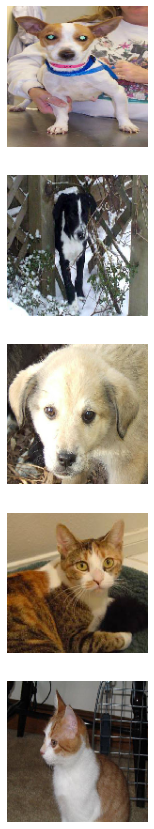

In [33]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [14]:
# 5
train_image_generator = ImageDataGenerator(rescale=1/255, fill_mode="nearest",
                                           horizontal_flip=True, vertical_flip=True,
                                           width_shift_range=0.3, height_shift_range=0.3,
                                           zoom_range=0.25, shear_range=0.25)


Found 2000 images belonging to 2 classes.


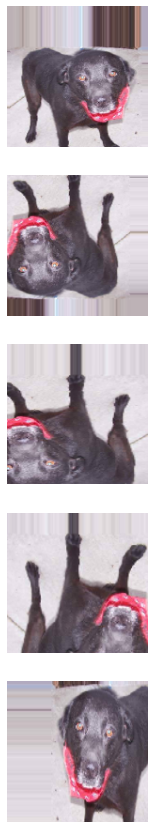

In [18]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [19]:
# 7
model = Sequential()
# model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64))
# model.add(Dense(1))
model.add(Dense(2))
# model.compile(optimizer='adam', metrics=['accuracy'], loss=BinaryCrossentropy(from_logits=True))
model.compile(optimizer='adam', metrics=['accuracy'], loss=SparseCategoricalCrossentropy(from_logits=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [26]:
total_train//batch_size, total_val//batch_size, total_train, total_val, batch_size

(15, 7, 2001, 1001, 128)

In [ ]:
# 8
# train_data_gen /= 255
# validation_data /= 255
history = model.fit(train_data_gen, steps_per_epoch=total_train//batch_size, epochs=epochs,
                    validation_data=val_data_gen, validation_steps=total_val//batch_size, verbose=1)

Epoch 1/20
15/15 [==============================] - 63s 4s/step - loss: 0.5989 - accuracy: 0.6645 - val_loss: 0.6031 - val_accuracy: 0.6562
Epoch 2/20
15/15 [==============================] - 57s 4s/step - loss: 0.5942 - accuracy: 0.6795 - val_loss: 0.6616 - val_accuracy: 0.6150
Epoch 3/20
15/15 [==============================] - 55s 4s/step - loss: 0.6180 - accuracy: 0.6394 - val_loss: 0.5636 - val_accuracy: 0.6964
Epoch 4/20
15/15 [==============================] - 56s 4s/step - loss: 0.5838 - accuracy: 0.6848 - val_loss: 0.5561 - val_accuracy: 0.7188
Epoch 5/20
15/15 [==============================] - 58s 4s/step - loss: 0.5840 - accuracy: 0.6896 - val_loss: 0.6720 - val_accuracy: 0.6328
Epoch 6/20
15/15 [==============================] - 57s 4s/step - loss: 0.6043 - accuracy: 0.6603 - val_loss: 0.8709 - val_accuracy: 0.5502
Epoch 7/20
 8/15 [===============>..............] - ETA: 22s - loss: 0.6211 - accuracy: 0.6332

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_images, _ = next(test_data_gen)
# print(test_images,_)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
# print(model.predict(test_data_gen))
plotImages(test_images, probabilities=probabilities)

In [ ]:
# 11
# Given probabilities and answers

answers = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
           1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
           0, 0, 0, 0, 0, 0]

# Calculate the number of correct predictions
correct = sum(round(prob) == ans for prob, ans in zip(probabilities, answers))

# Calculate the percentage of correctly identified images
percentage_identified = (correct / len(answers)) * 100

# Determine if the challenge is passed
passed_challenge = percentage_identified >= 63

# Print the results
print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("Congratulations! You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")
